## Project description

For this project I assumed the role as an analyst at a large online store. I have worked alongside the marketing department to compile a list of hypotheses aimed at boosting revenue. Now, my task is to prioritize these hypotheses, conduct an A/B test, and analyze the resulting data.

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import matplotlib as mpl
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

hypo = pd.read_csv(r"hypotheses_us.csv")
orders = pd.read_csv(r"orders_us.csv")
visitors = pd.read_csv(r"visits_us.csv")

In [2]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
# Customized the dataframe so the hypotheses are fully displayed.
pd.set_option('max_colwidth', 400)

In [5]:
hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
visitors.duplicated().sum()

0

In [11]:
orders.shape

(1197, 5)

In [12]:
# Identifying the orders that are in both groups
orders_dupe = orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group>1')

In [13]:
# Removed duplicates
orders = (orders[~orders.visitorId.isin(orders_dupe.visitorId)])

In [14]:
orders.shape

(1016, 5)

The data is relatively simple no big changes needed, I only removed the duplicates.

## Part 1. Prioritizing Hypotheses

### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [15]:
# Calculating ICE
hypo['ICE'] = (hypo['Impact'] * hypo['Confidence'])/hypo['Effort']

hypo[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


**We can see that method 8,0,7 is the most promising out of all hypothesises.**

### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [16]:
# Calculating RICE
hypo['RICE'] = (hypo['Reach'] * hypo['Impact'] * hypo['Confidence'])/hypo['Effort']

hypo[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Again hypothesis number 7 and 0 is amongst the top three. We can take a note that number 7 has the biggest reach meaning that one will affect the most amount of people.

### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

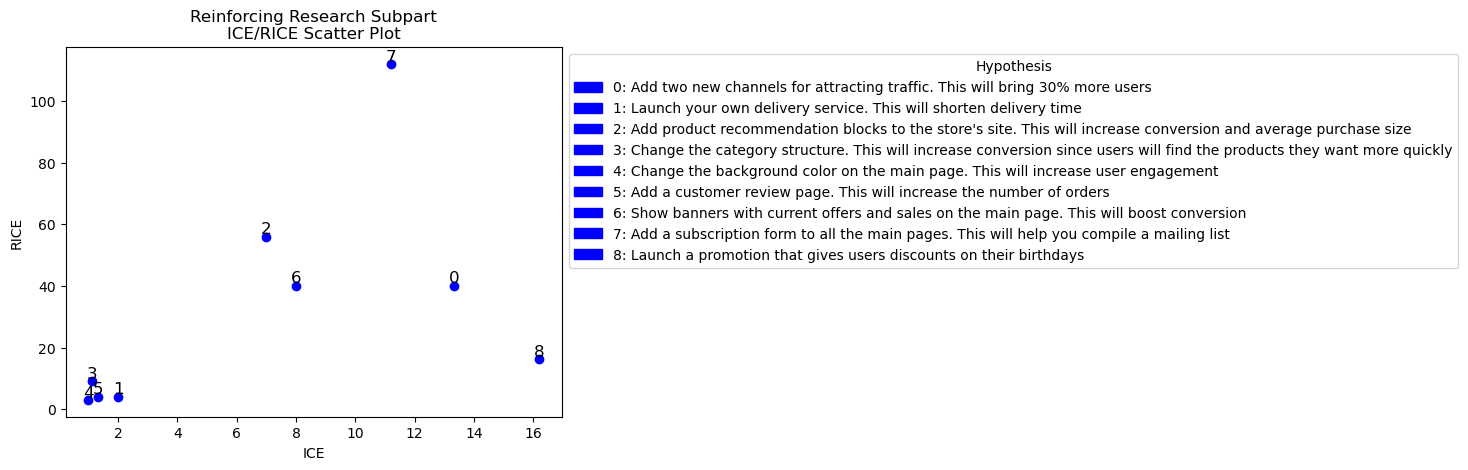

In [17]:
# Create a scatter plot
scatter = plt.scatter(hypo['ICE'], hypo['RICE'], marker='o', color='blue')

# Add labels to the data points
for i, txt in enumerate(hypo.index):
    plt.annotate(txt, (hypo['ICE'][i], hypo['RICE'][i]), fontsize=12, ha='center', va='bottom')

# Add axis labels and a title
plt.xlabel('ICE')
plt.ylabel('RICE')
plt.title('Reinforcing Research Subpart\nICE/RICE Scatter Plot')

# Create custom legend elements with hypothesis names
legend_elements = []
for i, row in hypo.iterrows():
    patch = mpatches.Patch(color='blue', label=f"{i}: {row['Hypothesis']}")
    legend_elements.append(patch)

# Add the legend
plt.legend(handles=legend_elements, title='Hypothesis', bbox_to_anchor=(1, 1), loc='upper left')

# Display the scatter plot
plt.show()

1. Quadrant Placement: The scatter plot is divided into four quadrants based on the x-axis (ICE) and y-axis (RICE).

 - Top-Right Quadrant: Hypotheses in this quadrant have high values for both ICE and RICE. These are high-priority hypotheses that offer significant impact, confidence, reach, and low effort. Consider focusing on these hypotheses first as they have the potential to yield substantial results.
 - Top-Left Quadrant: Hypotheses in this quadrant have high values for ICE but relatively lower values for RICE. These hypotheses may have high impact and confidence but limited reach. They are worth considering, but the reach should be evaluated to determine their overall priority.
 - Bottom-Right Quadrant: Hypotheses in this quadrant have high values for RICE but relatively lower values for ICE. These hypotheses have high reach but may not offer as much impact or confidence. They are worth exploring due to their potential to reach a large audience, but further analysis is needed to assess their impact.
 - Bottom-Left Quadrant: Hypotheses in this quadrant have relatively lower values for both ICE and RICE. These hypotheses have limited impact, confidence, and reach. They may not be a priority and can be deprioritized or reconsidered.
 
 
2. Hypothesis Labels: Each data point represents a hypothesis and is labeled with its corresponding hypothesis ID number. The ID number helps identify and reference specific hypotheses for further analysis or decision-making.


3. Legend: The legend next to the plot provides a list of hypotheses with their ID numbers and names. It helps you associate the ID numbers shown in the plot with the actual hypothesis names, allowing for easy identification and understanding of each data point.

By analyzing the positions of the data points, their respective hypothesis IDs, and referring to the legend, you can gain insights into the prioritization of hypotheses based on their ICE and RICE scores. The plot helps you identify high-priority hypotheses that offer a balance of impact, confidence, reach, and effort, aiding in the decision-making process for research reinforcement.

## Part 2. A/B Test Analysis

### Analyze the A/B test

#### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

In [18]:
# Get rid of duplicates
datesGroups = orders[['date','group']].drop_duplicates()

In [19]:
# Calculating metrics such as the number of unique transactions, unique visitors, and total revenue for each date and group combination.
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [20]:
# Calculating the total number of visits for each date and group combination.
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
# Calculating various metrics such as the number of unique transactions, unique visitors, and total revenue for each date and group combination.
datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

datesGroups.sample(5)

,date,group
1068,2019-08-12,A
835,2019-08-08,A
859,2019-08-10,A
125,2019-08-17,B
958,2019-08-31,A


In [22]:
# Merged the to dataframes above
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulativeData.sample(5)

,date,group,orders,buyers,revenue,visits
35,2019-08-18,B,327,321,34684.7,11171
50,2019-08-26,A,396,378,43604.3,15665
58,2019-08-30,A,460,437,52363.7,18037
52,2019-08-27,A,419,400,46539.0,16376
14,2019-08-08,A,144,133,11638.8,5239


In [23]:
# Seperated A and B groups
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

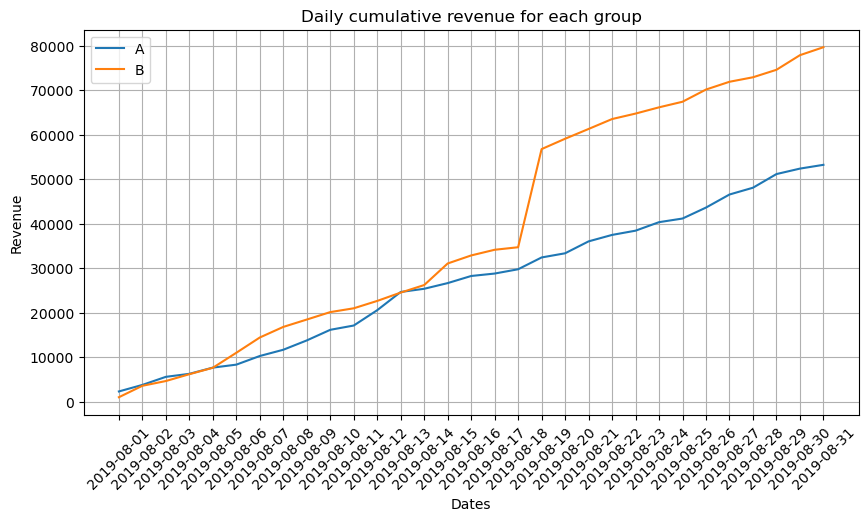

In [24]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Daily cumulative revenue for each group')
plt.xlabel('Dates')
plt.ylabel('Revenue')

plt.xticks(rotation=45)  # Rotate the x-axis tick labels for better visibility
plt.grid(True)  # Turn on the grid

plt.legend()  # Display the legend

plt.show()

Segment B took a huge lead halfway through the test and held on to it. That big jump caused by some abnormally big orders.

#### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

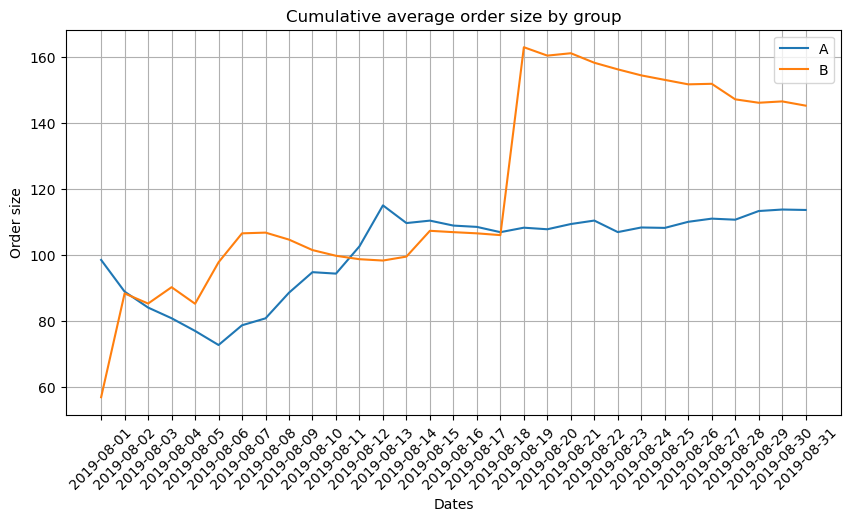

In [25]:
plt.figure(figsize=(10, 5))  # Set the figure size


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average order size by group')
plt.xlabel('Dates')
plt.ylabel('Order size')

plt.xticks(rotation=45)  # Rotate the x-axis tick labels for better visibility
plt.grid(True)  # Turn on the grid

plt.legend()  # Display the legend

plt.show()

We see the same kind of big jump around halfway where Segment B takes the lead.

#### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [26]:
# Merged cumulative revenues
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

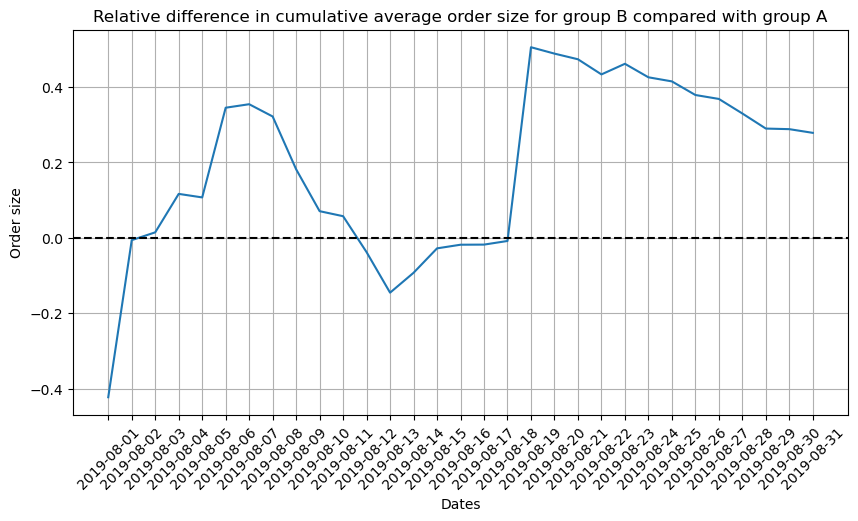

In [27]:
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.xlabel('Dates')
plt.ylabel('Order size')

plt.xticks(rotation=45)  # Rotate the x-axis tick labels for better visibility
plt.grid(True)  # Turn on the grid

plt.show()

At several points the difference between the segments spikes. This means there must be some big orders and outliers. Sooner or later we will need to filter these out.

#### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [28]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

In [29]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

(0.0, 30.0, 0.0, 0.05)

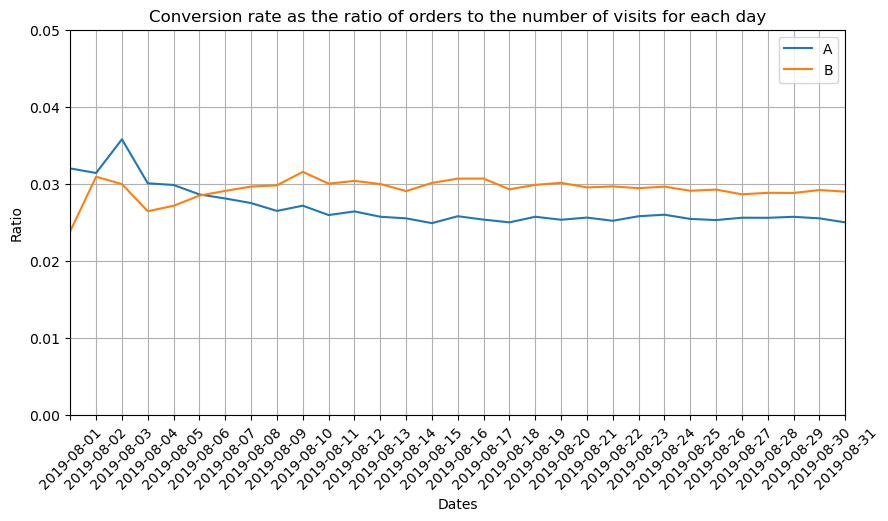

In [30]:
# plotting the graphs
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Conversion rate as the ratio of orders to the number of visits for each day')
plt.xlabel('Dates')
plt.ylabel('Ratio')

plt.xticks(rotation=45)  # Rotate the x-axis tick labels for better visibility
plt.grid(True)  # Turn on the grid

plt.legend()  # Display the legend

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])

Segment B has a higher conversion rate through the whole test. I made the graph's scale to make it clear that the absolute value of the fluctuation at the beginning and end of the test wasn't that high at all: within 1% during the whole test.

#### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [31]:
# Calculating the number of unique transactions made by each visitor.
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [32]:
# Identfied the columns we need
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).sample(10)

,visitorId,orders
764,3283584911,1
791,3372131337,1
244,1035424004,1
874,3819243527,1
232,991436984,1
312,1378148355,1
602,2633052872,1
259,1122598516,1
703,3055165772,1
866,3778207363,1


In [33]:
ordersByUsers['orders'].value_counts()

1    937
2     29
3      7
Name: orders, dtype: int64

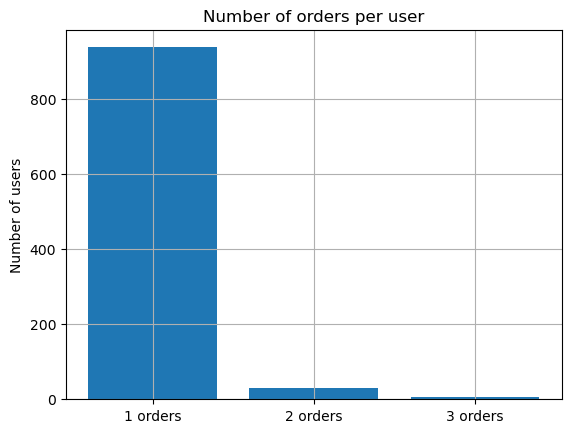

In [34]:
plt.hist(ordersByUsers['orders']) 

# Count the number of occurrences for each order count
order_counts = np.bincount(ordersByUsers['orders'])

# Specify the order counts to display
x_ticks = [1, 2, 3]
x_labels = [f'{count} orders' for count in x_ticks]

# Create a bar plot
plt.bar(x_ticks, order_counts[1:4], tick_label=x_labels)

# Set plot title and axis labels
plt.title('Number of orders per user')
plt.ylabel('Number of users')

plt.grid(True)
plt.show()

We can see that a really big amount of users only had 1 orders. A small amount had 2 or 3.

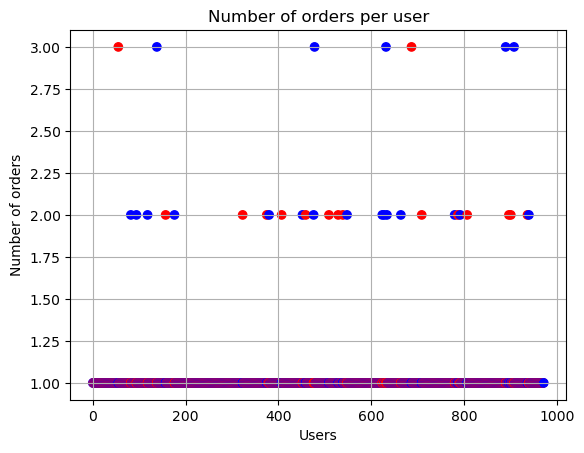

In [35]:
# Generate x-axis values
x_values = pd.Series(range(0, len(ordersByUsers)))

# Generate colors for AB groups
colors = np.where(x_values % 2 == 0, 'blue', 'red')

# Create the scatter plot with colored points
plt.scatter(x_values, ordersByUsers['orders'], c=colors)

# Set plot title and axis labels
plt.title('Number of orders per user')
plt.xlabel('Users')
plt.ylabel('Number of orders')

plt.grid(True)
plt.show()

The conclusion is from the histogram is confirmed, most of the people had only 1 orders.

#### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Nor more than 5% of users has more than 1 order and 1% at least 2 orders. In reality it means that most of the users had 1 orders and a small amount had 2 or 3. The abnormal point is above 2 orders.

#### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

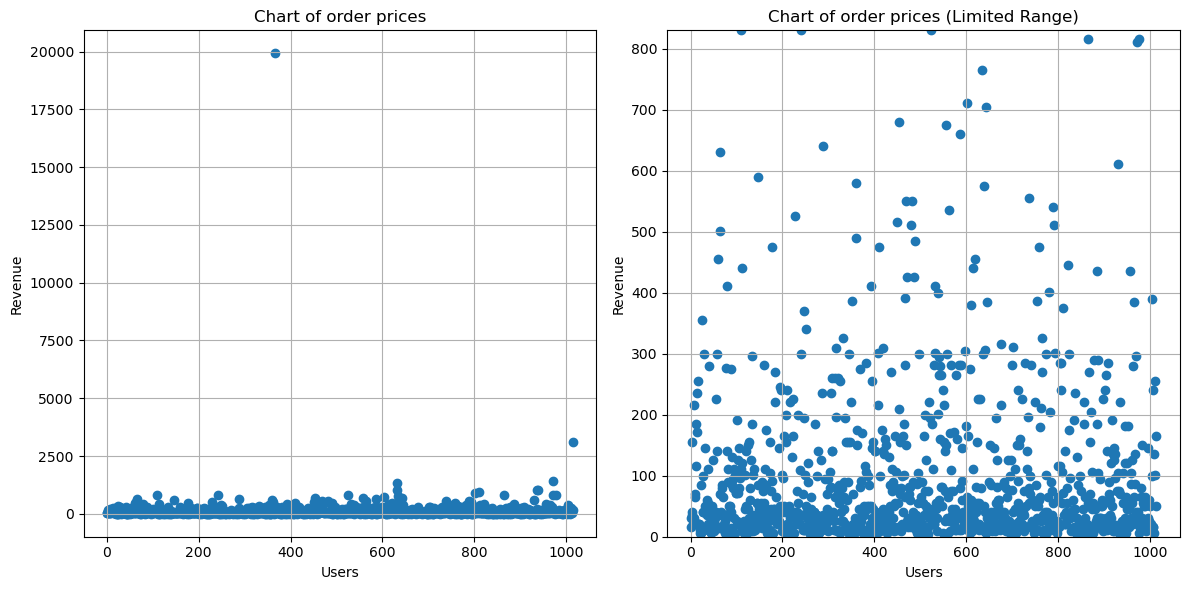

In [37]:
# Generate x-axis values
x_values = pd.Series(range(0, len(orders['revenue'])))

# Set the figure size and create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original scatter plot
axs[0].scatter(x_values, orders['revenue'])
axs[0].set_title('Chart of order prices')
axs[0].set_xlabel('Users')
axs[0].set_ylabel('Revenue')
axs[0].grid(True)

# Limited y-axis scatter plot
axs[1].scatter(x_values, orders['revenue'])
axs[1].set_title('Chart of order prices (Limited Range)')
axs[1].set_xlabel('Users')
axs[1].set_ylabel('Revenue')
axs[1].grid(True)

# Set the y-axis limits for the limited range scatter plot
top_limit = np.percentile(orders['revenue'], 99)
axs[1].set_ylim(bottom=0, top=top_limit)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The order prices have relatively small amount of outliers.

#### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

Nor more than 5% of orders cost more than 414.275 USD and not more than 1% cost more than 830.3 USD. I would say the abnormal point is higher than 5% but lower than 1%. I would make 600 USD is the point.

#### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [40]:
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

### There is a difference in terms of conversions  beetween group A and B using the raw data.
H0 : The difference regarding the conversions are statistically insignificant between the groups.

Ha : Conversions differs between the groups.

###### Assumptions
Observations in each sample are independent and identically distributed.
Observations in each sample are normally distributed.
Observations in each sample have different variance

###### Interpretation
H0: orders sizes are equal. H1: order sizes are different.

In [42]:
alpha = .05

print('P-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Relative gain of group B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.862
Relative gain of group B: 0.278


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups using the raw data. Nonetheless, the average order size for group A is much smaller than it is for group B.

The relative gain of group B is 27.8% regarding conversions.

#### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 600]['visitorId']

In [44]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: visitorId, dtype: int64


In [45]:
print("Abnormal users in total:",abnormalUsers.shape)

Abnormal users in total: (31,)


In [46]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

### There is a difference in terms of conversions  beetween group A and B using the filtered data.
H0 : The difference regarding the conversions are statistically insignificant between the groups.

Ha : Conversions differs between the groups.

###### Assumptions
Observations in each sample are independent and identically distributed.
Observations in each sample are normally distributed.
Observations in each sample have different variance

###### Interpretation
H0: conversions are equal in the groups. H1: conversions are different in the groups.

In [47]:
alpha = .05

print("P-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative="two-sided")[1]))
print("Relative gain of group B: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.005
Relative gain of group B: 0.203


The results for conversion almost didn't change. The p-value still significantly lower than 0.05 so we can reject the null hypotesis. The relative gain of group B is 20.3%.

#### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

### The avarage order size differs beetween group A and B using the filtered data.
H0 : The difference regarding the average order sizes are statistically insignificant between the groups.

Ha : The average order size do differs between the groups.

###### Assumptions
Observations in each sample are independent and identically distributed.
Observations in each sample are normally distributed.
Observations in each sample have different variance.

###### Interpretation
H0: orders sizes are equal. H1: order sizes are different.

In [48]:
print('P-value: {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative="two-sided")[1]))

print('Relative gain of group B: {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

P-value: 0.941
Relative gain of group B: 0.042


The p-value is even higher, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups using the filtered data. In the unfiltered data the difference turned around and now group A has a relative gain of 4.2%. It shows us how the anomalies can affect A/B test results.

#### 13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Considering these results, the test can be considered inconclusive. The filtered data indicates that there is a difference in conversion rates between the groups, favoring group B. However, the raw data does not show a significant difference in average order size. Therefore, it is recommended to further investigate the anomalies or outliers in the data to understand their impact on the results. Additionally, collecting more data and conducting additional tests may provide more reliable insights.

Revised decision: Continue the test, but with caution and further investigation into the anomalies present in the data.

(The raw and filtered data revealed statistically significant difference in conversion between the groups. Regarding the order size the raw data show a big difference but the filtered data actually shows a drop in group B. Based on these facts, we can conclude that the test is unsuccessful and should be stopped. There's no use continuing it, since the probability that segment B will turn out to be better than segment A is almost nonexistent.)